In [67]:
import pandas as pd
import numpy as np
import seaborn as sns

In [68]:
df= pd.read_csv("merged.csv")

In [69]:
df.shape

(4198, 29)

In [70]:
df.head()

,E.Colli,Coliform,Arsen,Kromium,Kadmium,Nitrit,Nitrat,Sianida,Selenium,Alumunium,...,Chlor,BOD5,COD,Bau,Warna,Kekeruhan,Rasa,Suhu,TDS,Potabilitas
0,0.0,0.0,0.008211,0.033758,0.002651,1.341045,26.183060,0.029120,0.004383,0.118025,...,0.347660,1.303905,1.943109,Tidak Berbau,13.0,4.369784,Tidak Berasa,26.61,40.0,1
1,0.0,0.0,0.006390,0.036294,0.001421,0.674963,47.406272,0.010811,0.005170,0.106107,...,0.685041,0.197455,4.802974,Tidak Berbau,1.0,3.760767,Tidak Berasa,26.61,179.0,1
2,0.0,0.0,0.000526,0.015886,0.001801,0.461791,20.388563,0.024968,0.007694,0.101517,...,0.552312,0.096539,1.005643,Tidak Berbau,9.0,0.251494,Tidak Berasa,26.61,227.0,1
3,0.0,0.0,0.001834,0.035139,0.001814,0.984060,33.154122,0.036068,0.002166,0.001679,...,0.533532,0.010193,1.443128,Tidak Berbau,12.0,3.745131,Tidak Berasa,26.61,81.0,1
4,0.0,0.0,0.000296,0.016542,0.001021,0.236862,28.173539,0.020301,0.006731,0.157492,...,0.285786,0.368136,2.681199,Tidak Berbau,10.0,0.708630,Tidak Berasa,26.61,213.0,1


Terdapat 27 fitur independen (independent features) dan 1 fitur dependen (dependent feature) dalam dataset yang telah diberikan. Detail untuk setiap fitur telah disediakan sebelumnya.

Tujuan dari analisis ini adalah menggunakan fitur "Potabilitas" sebagai target (target feature) untuk masalah klasifikasi. Dengan kata lain, kita ingin memprediksi apakah air yang terkandung dalam dataset ini dapat diklasifikasikan sebagai air yang dapat diminum (potable) atau tidak.

**Datatype of the features**

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198 entries, 0 to 4197
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   E.Colli      4188 non-null   float64
 1   Coliform     4135 non-null   float64
 2   Arsen        4198 non-null   float64
 3   Kromium      4198 non-null   float64
 4   Kadmium      4197 non-null   float64
 5   Nitrit       4194 non-null   float64
 6   Nitrat       4194 non-null   float64
 7   Sianida      4198 non-null   float64
 8   Selenium     4198 non-null   float64
 9   Alumunium    4198 non-null   float64
 10  Besi         4198 non-null   float64
 11  Kesadahan    4198 non-null   float64
 12  Klorida      4198 non-null   float64
 13  Mangan       4198 non-null   float64
 14  pH           4197 non-null   float64
 15  Seng         4198 non-null   float64
 16  Sulfat       4197 non-null   float64
 17  Tembaga      4197 non-null   float64
 18  Amonia       4191 non-null   float64
 19  Chlor 

Dari hasil di atas kecuali fitur "Target", Bau dan Rasa, fitur lainnya type-nya adalah nilai float dan berkelanjutan (continuous). Namun, fitur "Potabilitas" dapat dikonversi menjadi fitur kategoris dan fitur Rasa dan Bau bisa dilakukan label encoding.

In [72]:
df['Potabilitas']=df['Potabilitas'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198 entries, 0 to 4197
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   E.Colli      4188 non-null   float64 
 1   Coliform     4135 non-null   float64 
 2   Arsen        4198 non-null   float64 
 3   Kromium      4198 non-null   float64 
 4   Kadmium      4197 non-null   float64 
 5   Nitrit       4194 non-null   float64 
 6   Nitrat       4194 non-null   float64 
 7   Sianida      4198 non-null   float64 
 8   Selenium     4198 non-null   float64 
 9   Alumunium    4198 non-null   float64 
 10  Besi         4198 non-null   float64 
 11  Kesadahan    4198 non-null   float64 
 12  Klorida      4198 non-null   float64 
 13  Mangan       4198 non-null   float64 
 14  pH           4197 non-null   float64 
 15  Seng         4198 non-null   float64 
 16  Sulfat       4197 non-null   float64 
 17  Tembaga      4197 non-null   float64 
 18  Amonia       4191 non-null  

Pendefinisian ulang makna : Menggunakan tipe data kategori memungkinkan kita untuk mendefinisikan ulang makna nilai dalam kolom. Dalam konteks "Potabilitas", angka 0 dan 1 mungkin tidak langsung dapat diartikan sebagai "tidak potabel" dan "potabel". Dengan mengubahnya menjadi tipe kategori, kita dapat memberikan label atau keterangan yang lebih deskriptif pada setiap nilai kategori, seperti "Tidak Potabel" dan "Potabel".

In [73]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Bau'] = label_encoder.fit_transform(df['Bau'])
df['Rasa '] = label_encoder.fit_transform(df['Rasa '])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198 entries, 0 to 4197
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   E.Colli      4188 non-null   float64 
 1   Coliform     4135 non-null   float64 
 2   Arsen        4198 non-null   float64 
 3   Kromium      4198 non-null   float64 
 4   Kadmium      4197 non-null   float64 
 5   Nitrit       4194 non-null   float64 
 6   Nitrat       4194 non-null   float64 
 7   Sianida      4198 non-null   float64 
 8   Selenium     4198 non-null   float64 
 9   Alumunium    4198 non-null   float64 
 10  Besi         4198 non-null   float64 
 11  Kesadahan    4198 non-null   float64 
 12  Klorida      4198 non-null   float64 
 13  Mangan       4198 non-null   float64 
 14  pH           4197 non-null   float64 
 15  Seng         4198 non-null   float64 
 16  Sulfat       4197 non-null   float64 
 17  Tembaga      4197 non-null   float64 
 18  Amonia       4191 non-null  

Label Encoder digunakan untuk mengubah nilai-nilai kategorikal dalam suatu fitur menjadi representasi numerik.

In [74]:
df.head()

,E.Colli,Coliform,Arsen,Kromium,Kadmium,Nitrit,Nitrat,Sianida,Selenium,Alumunium,...,Chlor,BOD5,COD,Bau,Warna,Kekeruhan,Rasa,Suhu,TDS,Potabilitas
0,0.0,0.0,0.008211,0.033758,0.002651,1.341045,26.183060,0.029120,0.004383,0.118025,...,0.347660,1.303905,1.943109,1,13.0,4.369784,1,26.61,40.0,1
1,0.0,0.0,0.006390,0.036294,0.001421,0.674963,47.406272,0.010811,0.005170,0.106107,...,0.685041,0.197455,4.802974,1,1.0,3.760767,1,26.61,179.0,1
2,0.0,0.0,0.000526,0.015886,0.001801,0.461791,20.388563,0.024968,0.007694,0.101517,...,0.552312,0.096539,1.005643,1,9.0,0.251494,1,26.61,227.0,1
3,0.0,0.0,0.001834,0.035139,0.001814,0.984060,33.154122,0.036068,0.002166,0.001679,...,0.533532,0.010193,1.443128,1,12.0,3.745131,1,26.61,81.0,1
4,0.0,0.0,0.000296,0.016542,0.001021,0.236862,28.173539,0.020301,0.006731,0.157492,...,0.285786,0.368136,2.681199,1,10.0,0.708630,1,26.61,213.0,1


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10784\1447402687.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='0.2f', square=True)


<AxesSubplot: >

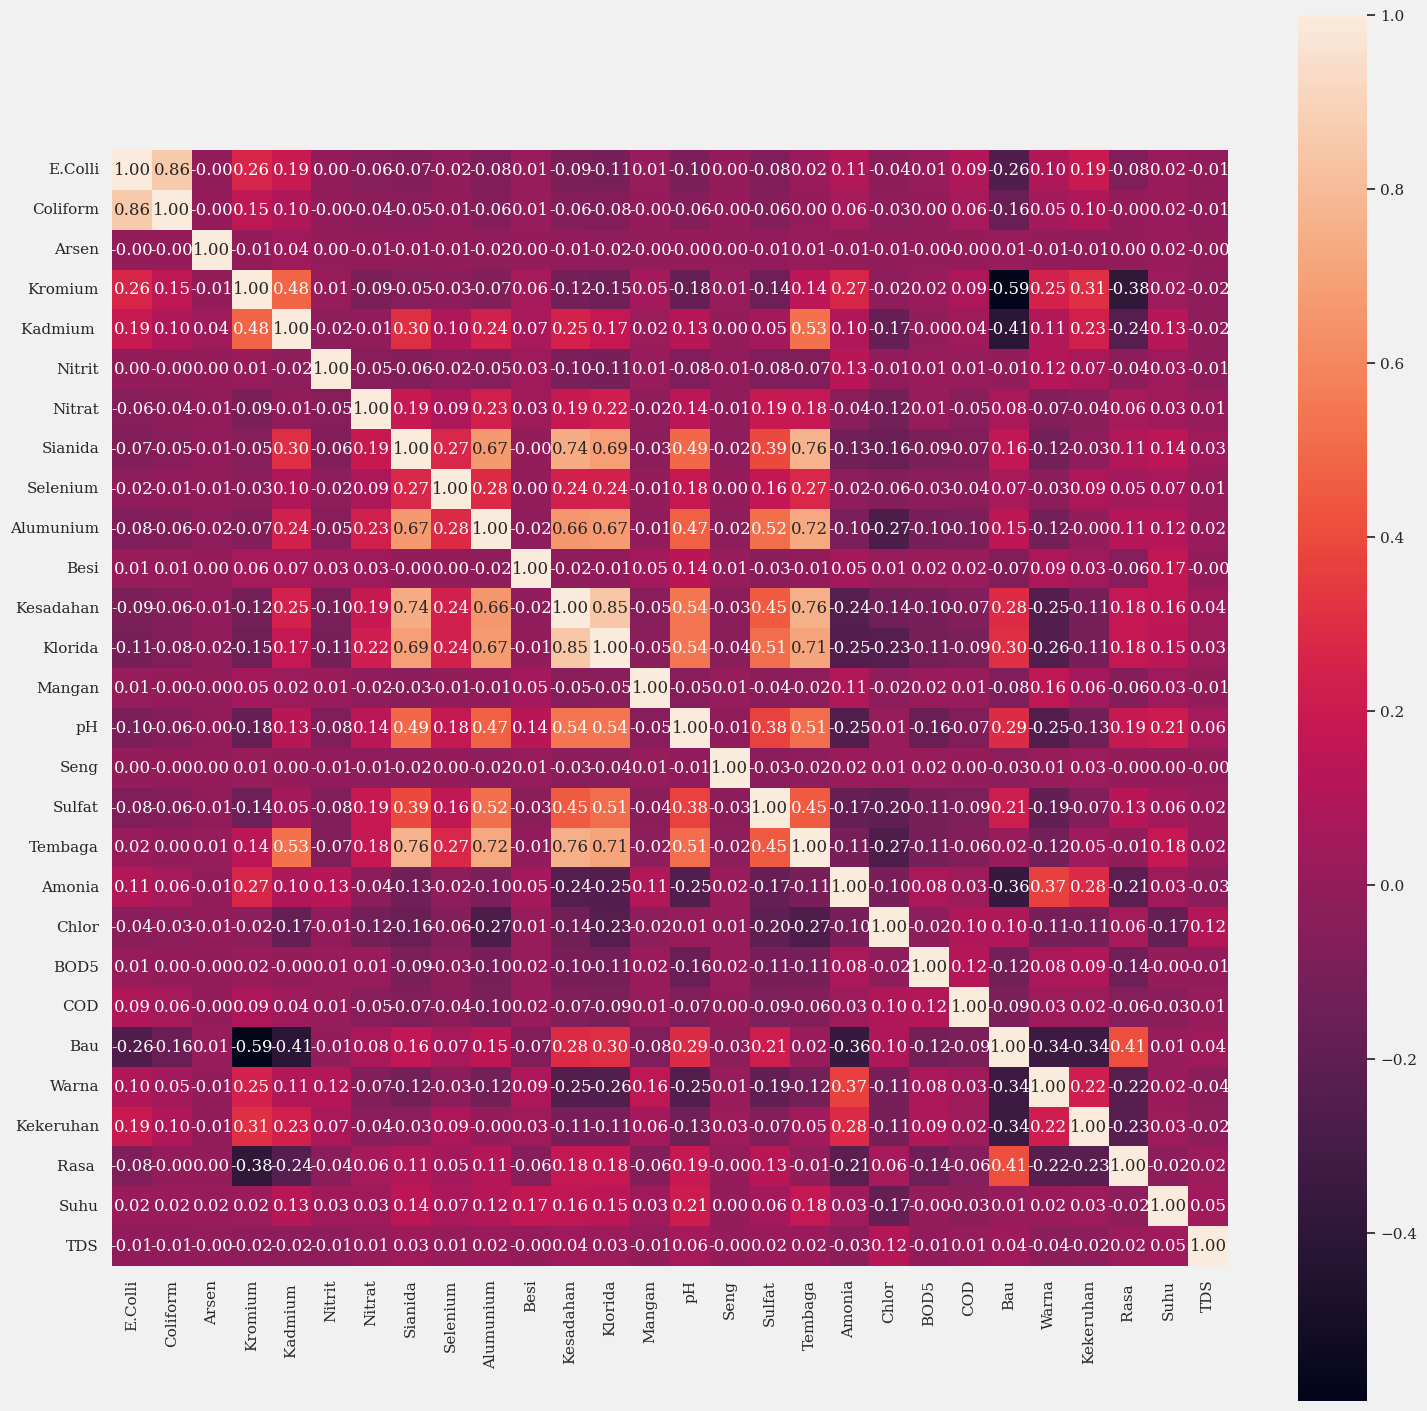

In [75]:
# Untuk menampilkan korelasi antar semua fitur dalam dataset
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', square=True)

Berdasarkan heatmap di atas menunjukan bahwa kolom COD dan BOD5 tidak memiliki korelasi yang kuat selain itu pada syarat baku mutu air itu sendiri tidak ada batasan khusus untuk 2 fitur tersebut. Sedangkan untuk suhu sendiri pada syarat baku air minum tidak ada batasan suhu harus berapa makannya di hapus

In [76]:
df.drop(columns=["COD", "BOD5", "Suhu"], inplace=True)

**Check For Missing Values**

In [77]:
df.isnull().sum()

E.Colli        10
Coliform       63
Arsen           0
Kromium         0
Kadmium         1
Nitrit          4
Nitrat          4
Sianida         0
Selenium        0
Alumunium       0
Besi            0
Kesadahan       0
Klorida         0
Mangan          0
pH              1
Seng            0
Sulfat          1
Tembaga         1
Amonia          7
Chlor           1
Bau             0
Warna           0
Kekeruhan       0
Rasa            0
TDS             3
Potabilitas     0
dtype: int64

Terlihat dari output di atas ada beberapa fitur yang memiliki missing value. Kita akan mengatasi missing value tersebut pada data numerik (karena type data untuk fitur yang memiliki missing value adalah float64).
Kita akan mengecek terlebih dahulu persentase data yang hilang pada masing masing fitur. Jika lebih dari 50% maka kita akan hilangkan fitur tersebut.

In [78]:
# Persentase nilai yang hilang pada kolom E.Colli
nan_ecolli = df['E.Colli'].isna().mean() * 100
print('Persentase Nilai yang Hilang pada Kolom E.Colli: {:.1f}%'.format(nan_ecolli))
# Persentase nilai yang hilang pada kolom Kadmium
nan_coliform = df['Coliform'].isna().mean() * 100
print('Persentase Nilai yang Hilang pada Kolom Coliform: {:.1f}%'.format(nan_coliform))
# Persentase nilai yang hilang pada kolom Kadmium
nan_kadmium = df['Kadmium '].isna().mean() * 100
print('Persentase Nilai yang Hilang pada Kolom Kadmium: {:.1f}%'.format(nan_kadmium))
# Persentase nilai yang hilang pada kolom pH
nan_ph = df['pH'].isna().mean() * 100
print('Persentase Nilai yang Hilang pada Kolom pH: {:.1f}%'.format(nan_ph))
nan_sulfat = df['Sulfat'].isna().mean() * 100
print('Persentase Nilai yang Hilang pada Kolom Sulfat: {:.1f}%'.format(nan_sulfat))
nan_tembaga = df['Tembaga'].isna().mean() * 100
print('Persentase Nilai yang Hilang pada Kolom Tembaga: {:.1f}%'.format(nan_tembaga))
nan_amonia = df['Amonia'].isna().mean() * 100
print('Persentase Nilai yang Hilang pada Kolom Amonia: {:.1f}%'.format(nan_amonia))
nan_chlor = df['Chlor'].isna().mean() * 100
print('Persentase Nilai yang Hilang pada Kolom Chlor: {:.1f}%'.format(nan_chlor))
nan_nitrat = df['Nitrat'].isna().mean() * 100
print('Persentase Nilai yang Hilang pada Kolom Nitrat: {:.1f}%'.format(nan_nitrat))
nan_nitrit = df['Nitrit'].isna().mean() * 100
print('Persentase Nilai yang Hilang pada Kolom Nitrit: {:.1f}%'.format(nan_nitrit))
nan_tds = df['TDS'].isna().mean() * 100
print('Persentase Nilai yang Hilang pada Kolom TDS: {:.1f}%'.format(nan_tds))

Persentase Nilai yang Hilang pada Kolom E.Colli: 0.2%
Persentase Nilai yang Hilang pada Kolom Coliform: 1.5%
Persentase Nilai yang Hilang pada Kolom Kadmium: 0.0%
Persentase Nilai yang Hilang pada Kolom pH: 0.0%
Persentase Nilai yang Hilang pada Kolom Sulfat: 0.0%
Persentase Nilai yang Hilang pada Kolom Tembaga: 0.0%
Persentase Nilai yang Hilang pada Kolom Amonia: 0.2%
Persentase Nilai yang Hilang pada Kolom Chlor: 0.0%
Persentase Nilai yang Hilang pada Kolom Nitrat: 0.1%
Persentase Nilai yang Hilang pada Kolom Nitrit: 0.1%
Persentase Nilai yang Hilang pada Kolom TDS: 0.1%


Mengganti Nilai yang Hilang pada Data Numerikal
1. Mean ---> Sangat sensitif terhadap outlier
2. Median ---> Tidak terlalu sensitif terhadap outlier
3. Modus
4. Nilai Maksimum atau Minimum
5. Nilai konstan, misalnya = 0

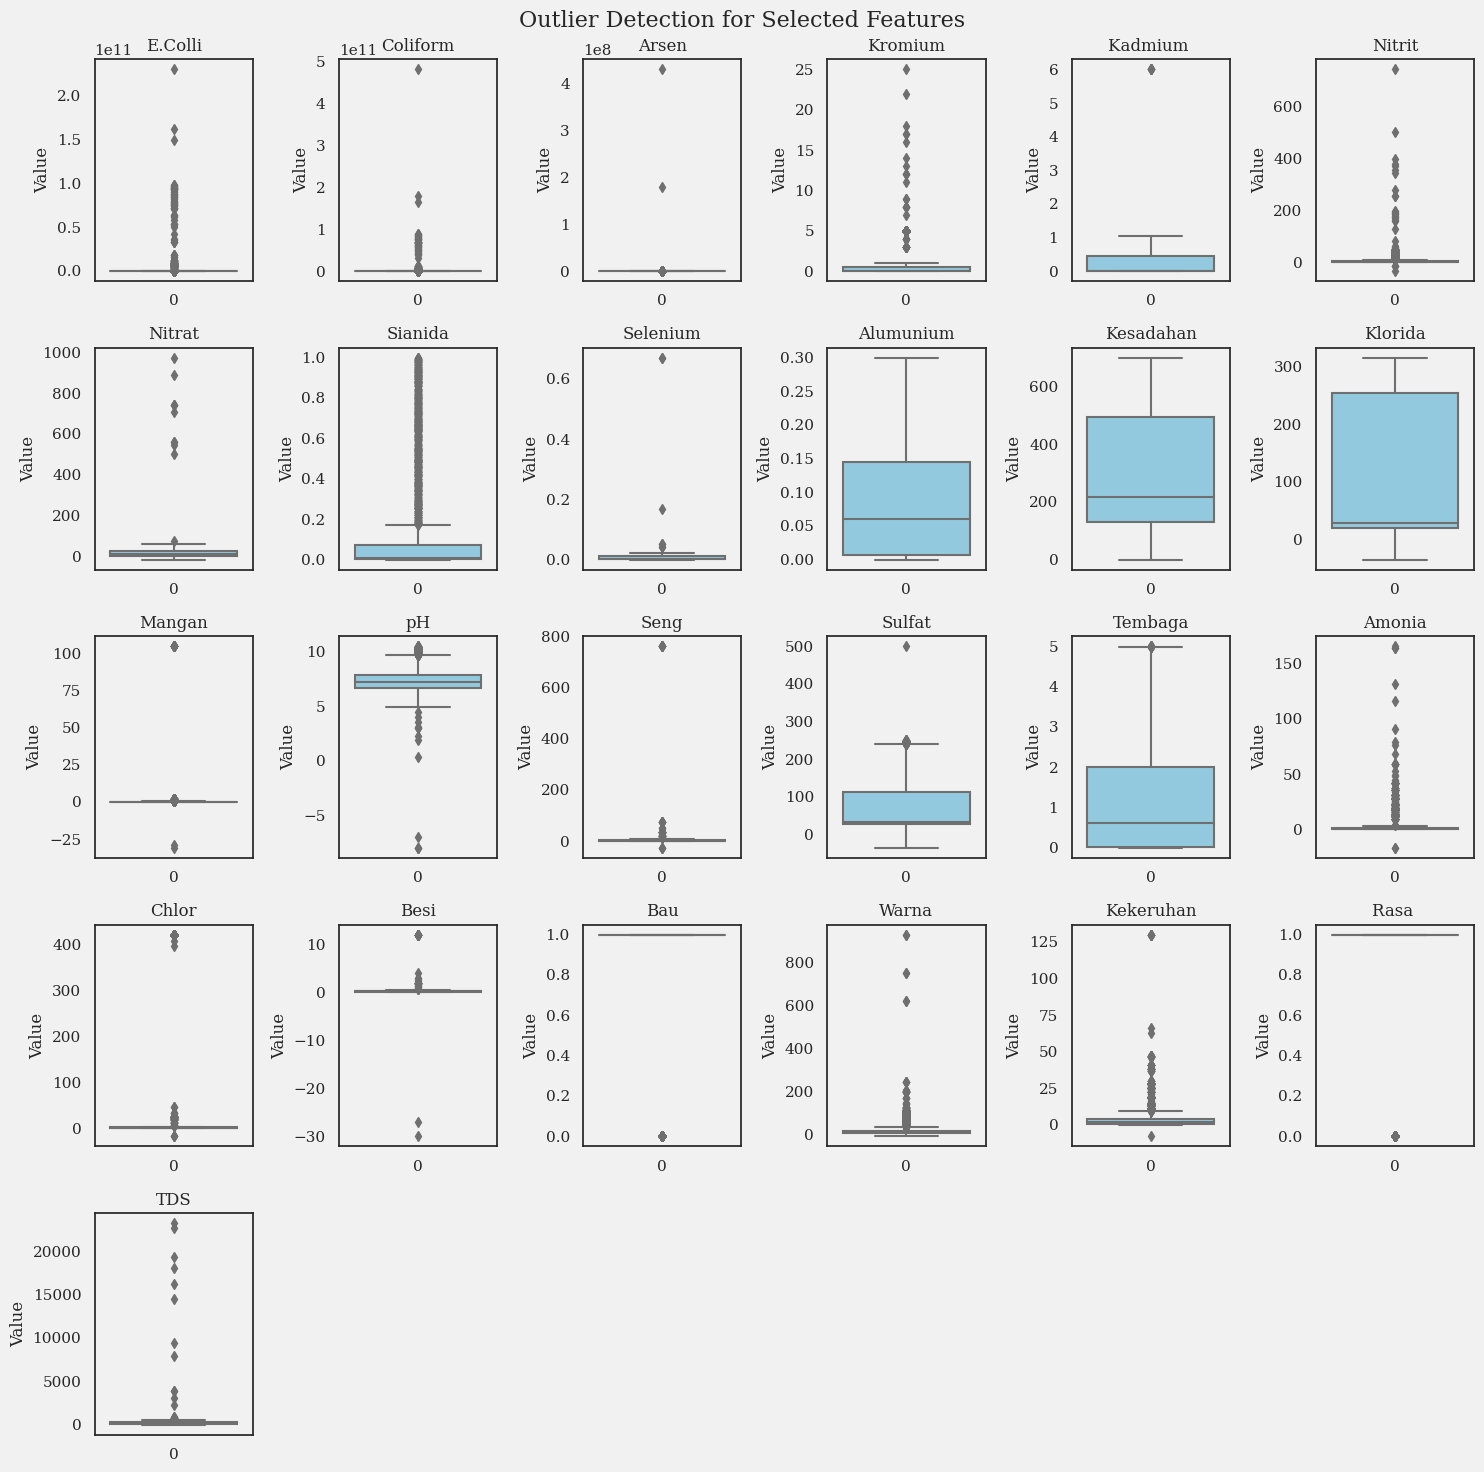

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

columns1 = ['E.Colli', 'Coliform', 'Arsen', 'Kromium', 'Kadmium ', 'Nitrit', 'Nitrat', 'Sianida', 'Selenium', 'Alumunium', 'Kesadahan', 'Klorida', 'Mangan', 'pH', 'Seng', 'Sulfat', 'Tembaga', 'Amonia', 'Chlor', 'Besi', 'Bau', 'Warna', 'Kekeruhan', 'Rasa ', 'TDS']

# Create a DataFrame with the selected columns
data = df[columns1]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(15, 15))
fig.suptitle('Outlier Detection for Selected Features', fontsize=16)

# Flatten the axes array
axes = axes.flatten()

# Plot the boxplots for each column
for i, column in enumerate(columns1):
    ax = axes[i]
    sns.boxplot(data=data[column], ax=ax, color='skyblue')
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('Value')

# Remove empty subplots
for j in range(len(columns1), len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


Berdasarkan visualisasi outlier di atas bahwa semua data yang terdapat missing value juga memiliki outlier sehingga untuk mengisi missing value tersebut menggunakan median.
Outlier di atas sengaja tidak di hapus dengan beberapa pertimbanagan
1. Jumlah data yang tersisa setelah penghapusan outlier sangat kecil yaitu (0 : 2238) (1 : 361) menjadi (0 : 59)(1 : 0)
2. Selain itu melalui (Referensi James et. Al (2021:98)) dapat ditarik kesimpulan bahwa pengumpulan data yang dikumpulkan sudah benar.
https://www.youtube.com/watch?v=EpokvnQOgog&t=2859s

In [80]:
# Mengganti Nilai yang Hilang dengan Median
import pandas as pd

columns = ['E.Colli', 'Coliform', 'Kadmium ', 'Nitrit', 'Nitrat', 'pH', 'Sulfat', 'Tembaga', 'Amonia', 'Chlor', 'TDS']

# Calculate the median for each column
median_values = df[columns].median()

# Fill missing values with the corresponding median values
df[columns] = df[columns].fillna(median_values)

# Check the result
print(df[columns].isna().sum())


E.Colli     0
Coliform    0
Kadmium     0
Nitrit      0
Nitrat      0
pH          0
Sulfat      0
Tembaga     0
Amonia      0
Chlor       0
TDS         0
dtype: int64


In [81]:
print(df['Potabilitas'].value_counts())

0    3237
1     961
Name: Potabilitas, dtype: int64


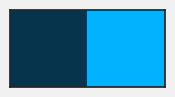

In [82]:
#Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})
sns.palplot(colors)

Text(0.8, 1500, 'Safe for Human consumption')

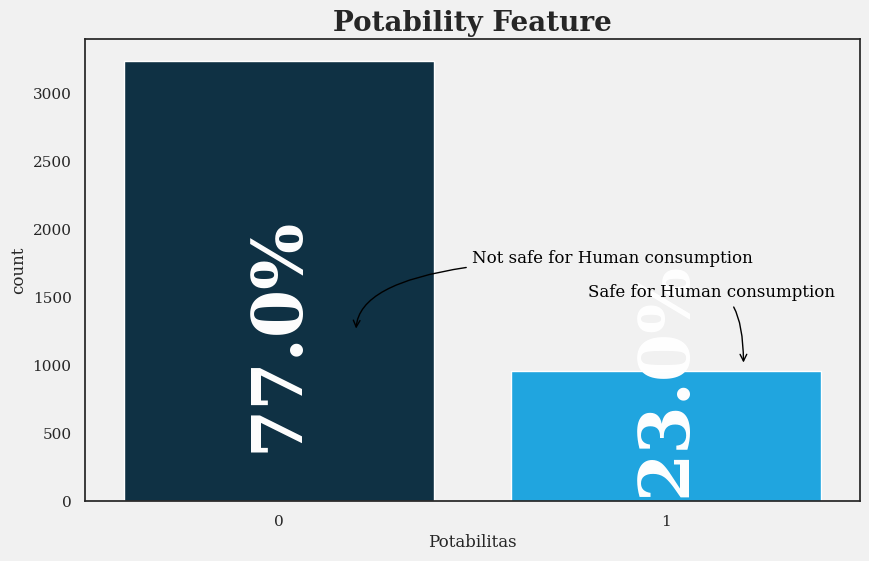

In [83]:
#Lets check the Target features first
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, x='Potabilitas')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(df)*100,0)}%", ha='center', size=50, weight='bold', rotation=90, color='white')
plt.title("Potability Feature", size=20, weight='bold')
plt.annotate(text="Not safe for Human consumption", xytext=(0.5,1750),xy=(0.2,1250), arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.annotate(text="Safe for Human consumption", xytext=(0.8,1500),xy=(1.2,1000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')

"**There is imbalance in the Target variable**" mengindikasikan bahwa terdapat ketidakseimbangan dalam variabel target (Target variable).
Ini berarti distribusi kelas pada variabel target tidak seimbang,
yaitu jumlah sampel yang termasuk ke dalam masing-masing kelas tidak proporsional atau tidak setara.

In [84]:
from imblearn.over_sampling import SMOTE

# Split the dataset into features (X) and target (y)
X = df.drop('Potabilitas', axis=1)
y = df['Potabilitas']

# Apply SMOTE to the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Potabilitas')], axis=1)


Text(0.8, 1500, 'Safe for Human consumption')

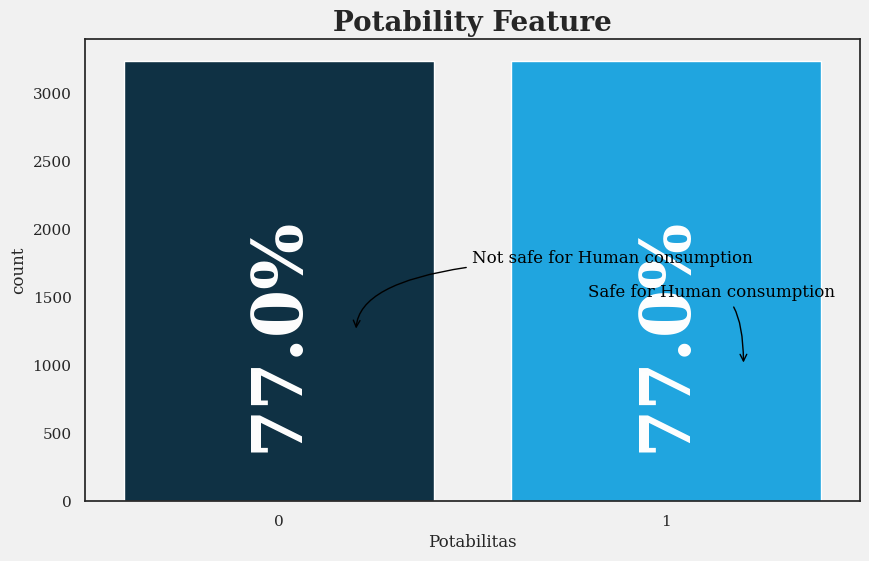

In [85]:
#Lets check the Target features first
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=df_resampled, x='Potabilitas')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(df)*100,0)}%", ha='center', size=50, weight='bold', rotation=90, color='white')
plt.title("Potability Feature", size=20, weight='bold')
plt.annotate(text="Not safe for Human consumption", xytext=(0.5,1750),xy=(0.2,1250), arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.annotate(text="Safe for Human consumption", xytext=(0.8,1500),xy=(1.2,1000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')

In [86]:
print(df_resampled['Potabilitas'].value_counts())

0    3237
1    3237
Name: Potabilitas, dtype: int64


In [87]:
X = df_resampled.drop(['Potabilitas'], axis=1)
y = df_resampled['Potabilitas']

# Melihat fitur-fitur dalam X
features = X.columns
print("Fitur-fitur dalam X:")
print(features)

# Melihat nilai target dalam y
target_values = y.unique()
print("Nilai target dalam y:")
print(target_values)


Fitur-fitur dalam X:
Index(['E.Colli', 'Coliform', 'Arsen', 'Kromium', 'Kadmium ', 'Nitrit',
       'Nitrat', 'Sianida', 'Selenium', 'Alumunium', 'Besi', 'Kesadahan',
       'Klorida', 'Mangan', 'pH', 'Seng', 'Sulfat', 'Tembaga', 'Amonia',
       'Chlor', 'Bau', 'Warna', 'Kekeruhan', 'Rasa ', 'TDS'],
      dtype='object')
Nilai target dalam y:
[1, 0]
Categories (2, int64): [0, 1]


Accuracy: 1.0


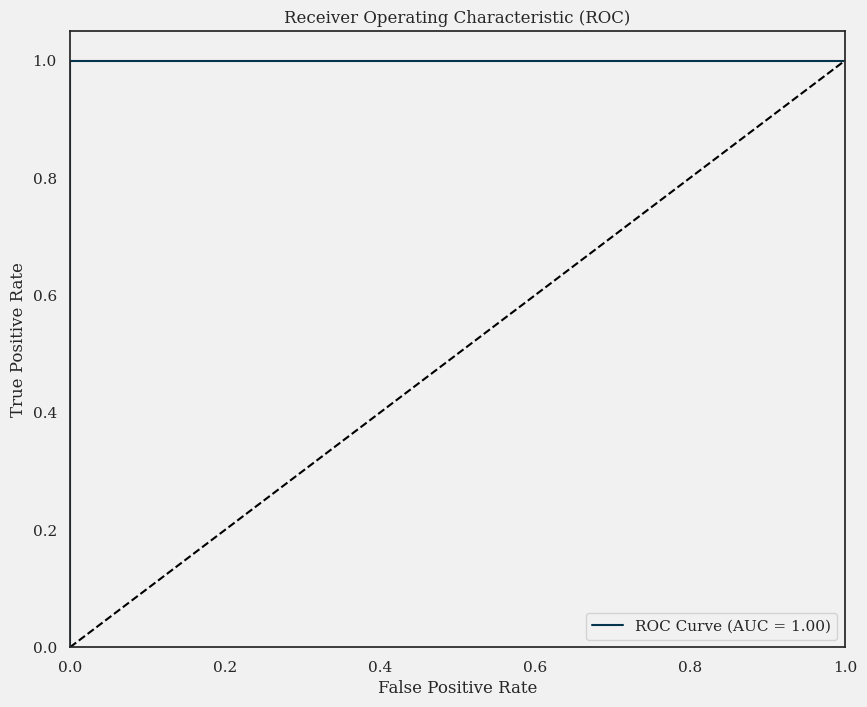

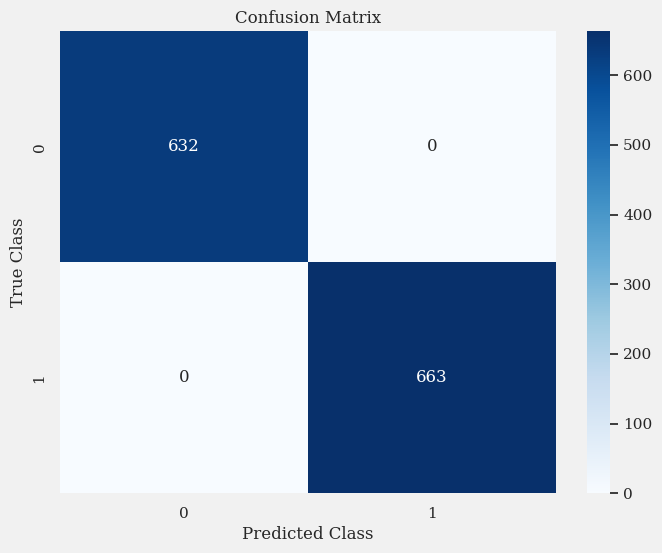

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       632
           1       1.00      1.00      1.00       663

    accuracy                           1.00      1295
   macro avg       1.00      1.00      1.00      1295
weighted avg       1.00      1.00      1.00      1295



In [88]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc

X = df_resampled.drop(['Potabilitas'], axis=1)
y = df_resampled['Potabilitas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Decision Tree model with specified parameters
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

# Predict on the test set
y_pred_dct = model1.predict(X_test)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred_dct)
print("Accuracy:", accuracy)

# Compute predicted probabilities
y_pred_prob = model1.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_dct)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test, y_pred_dct)
print(report)



Accuracy: 1.0


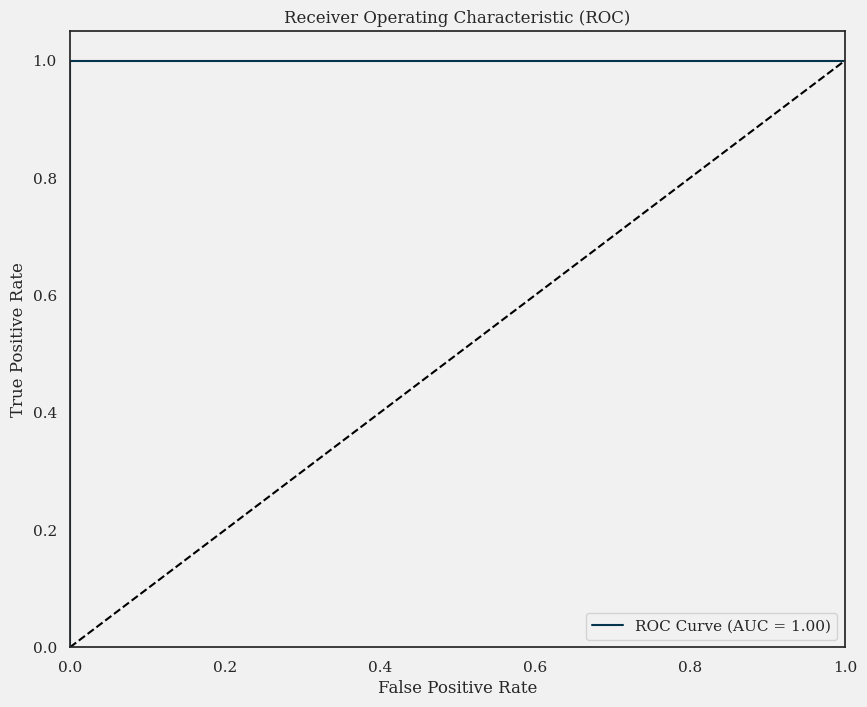

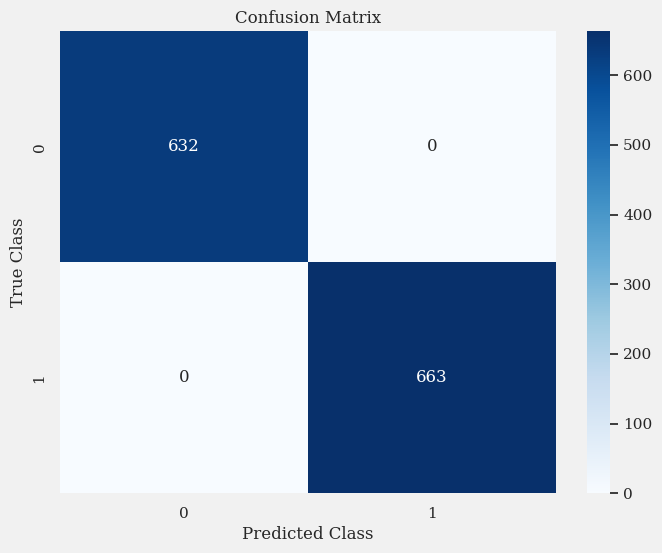

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       632
           1       1.00      1.00      1.00       663

    accuracy                           1.00      1295
   macro avg       1.00      1.00      1.00      1295
weighted avg       1.00      1.00      1.00      1295



In [89]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier

X = df_resampled.drop(['Potabilitas'], axis=1)
y = df_resampled['Potabilitas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Decision Tree model with specified parameters
model2 = KNeighborsClassifier (n_neighbors = 5)
model2.fit(X_train, y_train)

# Predict on the test set
y_pred_dct = model1.predict(X_test)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred_dct)
print("Accuracy:", accuracy)

# Compute predicted probabilities
y_pred_prob = model1.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_dct)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test, y_pred_dct)
print(report)



In [90]:
from sklearn.preprocessing import StandardScaler
#input_data = 
#(0, 0, 0.01, 0.01, 0.001, 3, 2, 0.01, 0.003, 0.002, 0.01, 0.01, 0.01, 0.001, 7, 1, 1, 0.1, 1, 0.1, 1, 7, 1, 1, 1)
input_data = (0, 0,	0.005655451158,	0.04422282104, 0.001929926869, 1.033424077, 49.25347042, 0.01636824787,	0.0010235004, 0.1585044317,	0.1763237466, 133.1428071, 100.8564594,	0.2105645123, 6.675382922, 1.914690199,	217.6817346, 1.300347124, 0.6097329691,	0.9097505099, 1, 7,	3.220473527, 1,	439)
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)


prediction = model1.predict(input_data_reshape)
print(prediction)

if(prediction[0] == 0) :
    print('Air Tidak Layak')

else :
    print('Air Layak')

[1]
Air Layak


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [91]:
from sklearn.metrics import accuracy_score, log_loss

# Prediksi label dari model
y_pred = model1.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Menghitung loss
loss = log_loss(y_test, y_pred)
print("Loss:", loss)


Akurasi: 1.0
Loss: 2.220446049250313e-16


**TESTING DATA BARU**

In [92]:
# Membaca data baru
df_test = pd.read_csv('Test2.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   E.Colli      1599 non-null   float64
 1   Coliform     1599 non-null   float64
 2   Arsen        1599 non-null   float64
 3   Kromium      1599 non-null   float64
 4   Kadmium      1599 non-null   float64
 5   Nitrit       1599 non-null   float64
 6   Nitrat       1599 non-null   float64
 7   Sianida      1599 non-null   float64
 8   Selenium     1599 non-null   float64
 9   Alumunium    1599 non-null   float64
 10  Besi         1599 non-null   float64
 11  Kesadahan    1599 non-null   float64
 12  Klorida      1599 non-null   float64
 13  Mangan       1599 non-null   float64
 14  pH           1599 non-null   float64
 15  Seng         1599 non-null   float64
 16  Sulfat       1599 non-null   float64
 17  Tembaga      1599 non-null   float64
 18  Amonia       1599 non-null   float64
 19  Chlor 

In [93]:
# Melakukan preprocessing terhadap data baru
df_test['Potabilitas']=df_test['Potabilitas'].astype('category')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   E.Colli      1599 non-null   float64 
 1   Coliform     1599 non-null   float64 
 2   Arsen        1599 non-null   float64 
 3   Kromium      1599 non-null   float64 
 4   Kadmium      1599 non-null   float64 
 5   Nitrit       1599 non-null   float64 
 6   Nitrat       1599 non-null   float64 
 7   Sianida      1599 non-null   float64 
 8   Selenium     1599 non-null   float64 
 9   Alumunium    1599 non-null   float64 
 10  Besi         1599 non-null   float64 
 11  Kesadahan    1599 non-null   float64 
 12  Klorida      1599 non-null   float64 
 13  Mangan       1599 non-null   float64 
 14  pH           1599 non-null   float64 
 15  Seng         1599 non-null   float64 
 16  Sulfat       1599 non-null   float64 
 17  Tembaga      1599 non-null   float64 
 18  Amonia       1599 non-null  

In [94]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_test['Bau'] = label_encoder.fit_transform(df_test['Bau'])
df_test['Rasa '] = label_encoder.fit_transform(df_test['Rasa '])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   E.Colli      1599 non-null   float64 
 1   Coliform     1599 non-null   float64 
 2   Arsen        1599 non-null   float64 
 3   Kromium      1599 non-null   float64 
 4   Kadmium      1599 non-null   float64 
 5   Nitrit       1599 non-null   float64 
 6   Nitrat       1599 non-null   float64 
 7   Sianida      1599 non-null   float64 
 8   Selenium     1599 non-null   float64 
 9   Alumunium    1599 non-null   float64 
 10  Besi         1599 non-null   float64 
 11  Kesadahan    1599 non-null   float64 
 12  Klorida      1599 non-null   float64 
 13  Mangan       1599 non-null   float64 
 14  pH           1599 non-null   float64 
 15  Seng         1599 non-null   float64 
 16  Sulfat       1599 non-null   float64 
 17  Tembaga      1599 non-null   float64 
 18  Amonia       1599 non-null  

In [95]:
# Menghapus kolom yang tidak digunakan (jika perlu)
df_test.drop(columns=["COD", "BOD5", "Suhu"], inplace=True)

In [96]:
df_test.isnull().sum()

E.Colli        0
Coliform       0
Arsen          0
Kromium        0
Kadmium        0
Nitrit         0
Nitrat         0
Sianida        0
Selenium       0
Alumunium      0
Besi           0
Kesadahan      0
Klorida        0
Mangan         0
pH             0
Seng           0
Sulfat         0
Tembaga        0
Amonia         0
Chlor          0
Bau            0
Warna          0
Kekeruhan      0
Rasa           0
TDS            0
Potabilitas    0
dtype: int64

In [97]:
print(df_test['Potabilitas'].value_counts())

0    999
1    600
Name: Potabilitas, dtype: int64


Prediksi: [1 1 1 ... 0 0 0]
Akurasi: 1.0


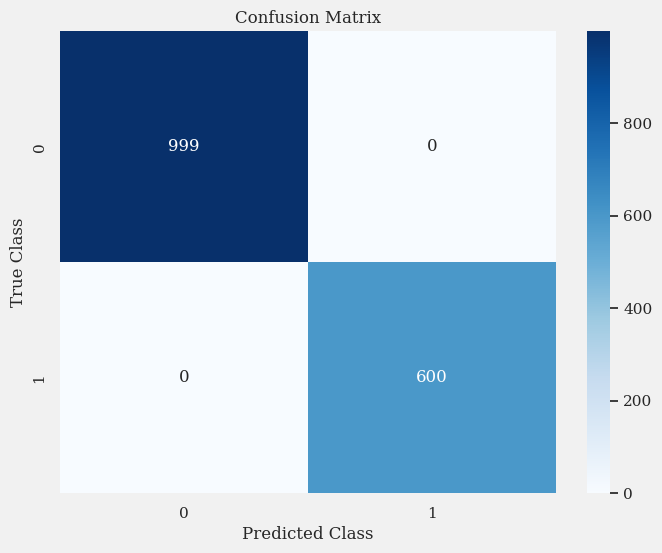

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       999
           1       1.00      1.00      1.00       600

    accuracy                           1.00      1599
   macro avg       1.00      1.00      1.00      1599
weighted avg       1.00      1.00      1.00      1599



In [98]:
# Memisahkan fitur dari data baru
X_test_new = df_test.drop(['Potabilitas'], axis=1)
y_test_new = df_test['Potabilitas']

# Memprediksi data baru menggunakan model
y_pred_new = model1.predict(X_test_new)

# Menampilkan hasil prediksi
print("Prediksi:", y_pred_new)

# Menghitung akurasi
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print("Akurasi:", accuracy_new)

# Compute confusion matrix
confusion_mat = confusion_matrix(y_test_new, y_pred_new)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test_new, y_pred_new)
print(report)

In [99]:
from sklearn.metrics import accuracy_score, log_loss

# Menghitung akurasi
accuracy = accuracy_score(y_test_new, y_pred_new)
print("Akurasi:", accuracy)

# Menghitung loss
loss = log_loss(y_test_new, y_pred_new)
print("Loss:", loss)

Akurasi: 1.0
Loss: 2.220446049250313e-16


In [100]:
import pickle
filename = 'Decisiontree_FIX.sav'
pickle.dump(model1, open(filename,'wb'))

In [ ]:
import pickle
filename = 'KNN_FIX.sav'
pickle.dump(model2, open(filename,'wb'))